In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [14]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_0504.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,-8.834,-7.547,-7.492,-6.299,-8.375,-5.832,-0.450,-11.205,-8.745,-10.667,-10.681,-7.576,-9.772,-5.211,-3.612,-12.260,-6.189,-6.433,-8.563,-5.635,NaN,-5.501,NaN,-11.080,-10.595,-10.307,-10.393,-11.305,-10.659,-5.129,-8.317,-12.273,-8.773,-9.811,-11.126,-8.035,-13.596,-4.460,-7.952,-10.163
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,-8.848,-7.545,-7.530,-6.344,-8.431,-5.953,-0.469,-11.241,-8.779,-10.688,-10.711,-7.664,-9.855,-5.367,-3.670,-12.331,-6.102,-6.320,-8.448,-5.721,NaN,-5.634,NaN,-11.057,-10.581,-10.266,-10.375,-11.289,-10.632,-5.209,-8.279,-12.290,-8.812,-9.723,-11.041,-8.038,-13.569,-4.587,-7.926,-10.200
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,-8.609,-8.615,-8.125,-6.367,-9.499,-6.075,-1.604,-11.908,-10.338,-11.525,-11.997,-7.760,-10.035,-6.533,-4.168,-13.088,-8.106,-8.059,-9.204,-6.477,NaN,-6.220,NaN,-12.061,-10.172,-11.785,-11.347,-12.182,-11.518,-6.123,-8.355,-12.869,-8.524,-11.336,-12.714,-8.710,-14.305,-4.961,-8.702,-11.181
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,-8.547,-8.442,-7.966,-6.316,-9.415,-6.023,-1.489,-11.944,-10.413,-11.339,-11.855,-7.726,-9.947,-6.485,-4.074,-13.166,-7.881,-7.617,-8.759,-6.512,NaN,-6.178,NaN,-12.002,-10.091,-11.605,-11.207,-12.132,-11.466,-6.056,-8.265,-12.888,-8.532,-11.069,-12.484,-8.620,-14.195,-4.866,-8.642,-11.218
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,-9.864,-9.072,-8.227,-6.143,-9.748,-6.153,-1.094,-12.619,-11.978,-12.255,-12.606,-7.872,-10.278,-6.155,-4.149,-14.389,-8.783,-8.327,-8.870,-5.659,NaN,-6.072,NaN,-13.328,-11.932,-12.455,-11.982,-11.921,-12.192,-5.818,-8.416,-13.450,-10.714,-11.864,-13.158,-8.105,-14.506,-4.911,-9.252,-12.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,-4.726,-5.591,-5.957,-6.671,-8.036,-6.359,-1.197,-10.038,-5.773,-7.570,-7.937,-6.891,-8.937,-6.735,-3.832,-10.899,-2.097,-3.122,-4.964,-5.804,NaN,-6.375,NaN,-8.333,-6.949,-7.076,-7.825,-10.087,-8.394,-5.878,-7.214,-11.035,-5.308,-6.842,-7.414,-8.437,-11.928,-5.184,-7.245,-9.125
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-8.769,-8.181,-7.537,-6.284,-8.641,-5.475,-1.257,-12.035,-11.032,-11.713,-11.904,-7.807,-9.977,-5.754,-4.398,-13.486,-7.434,-7.932,-9.104,-6.656,NaN,-5.626,NaN,-12.450,-11.306,-11.827,-11.557,-12.290,-11.599,-5.204,-8.701,-13.134,-9.994,-11.946,-13.222,-9.025,-14.598,-4.374,-8.895,-11.358
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,-8.145,-7.694,-7.313,-5.833,-8.132,-5.419,-0.907

In [15]:
# MPRA_UPSTREAM  = 'ACGAAAATGTTGGATGCTCATACTCGTCCTTTTTCAATATTATTGAAGCATTTATCAGGGTTACTAGTACGTCTCTCAAGGATAAGTAAGTAATATTAAGGTACGGGAGGTATTGGACAGGCCGCAATAAAATATCTTTATTTTCATTACATCTGTGTGTTGGTTTTTTGTGTGAATCGATAGTACTAACATACGCTCTCCATCAAAACAAAACGAAACAAAACAAACTAGCAAAATAGGCTGTCCCCAGTGCAAGTGCAGGTGCCAGAACATTTCTCTGGCCTAACTGGCCGCTTGACG'
# MPRA_DOWNSTREAM= 'CACTGCGGCTCCTGCGATCTAACTGGCCGGTACCTGAGCTCGCTAGCCTCGAGGATATCAAGATCTGGCCTCGGCGGCCAAGCTTAGACACTAGAGGGTATATAATGGAAGCTCGACTTCCAGCTTGGCAATCCGGTACTGTTGGTAAAGCCACCATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCT'
# MPRA_df['seq_800'] = MPRA_UPSTREAM + MPRA_df['seq'] + MPRA_DOWNSTREAM
# MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len800.csv', index=False)

In [16]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

In [17]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

In [ ]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
    for cell_type in cell_types:
        for cell_type_assay in cell_types_assay:
            df = MPRA_df
            x, y = df[f'{cell_type}'], df[f'{cell_type_assay}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_assay] = r
    print(assay)
    print(corr_matrix)

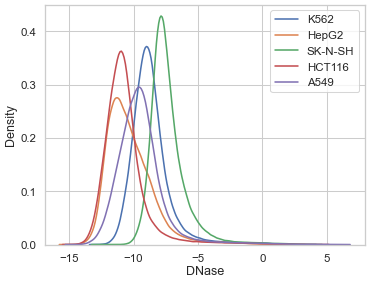

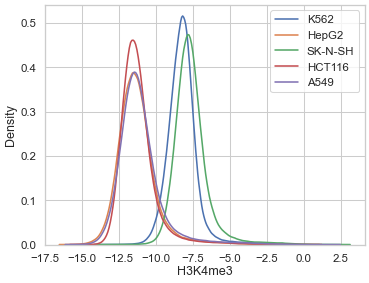

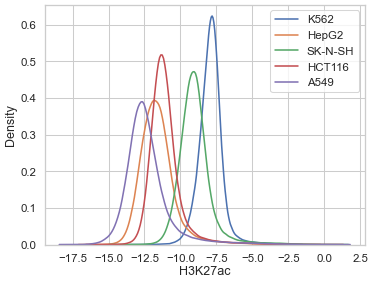

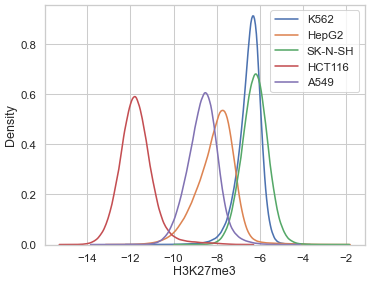

/tmp/ipykernel_1505737/438418021.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


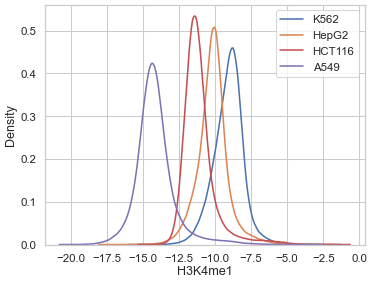

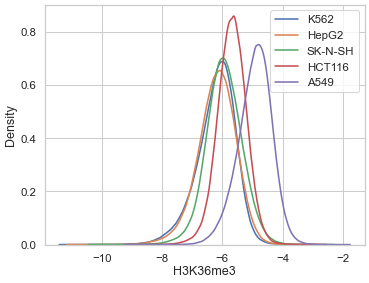

/tmp/ipykernel_1505737/438418021.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


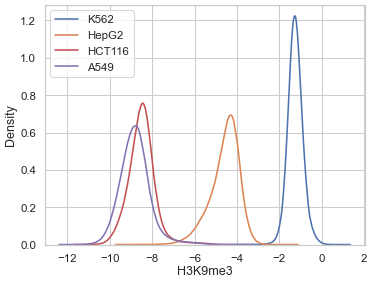

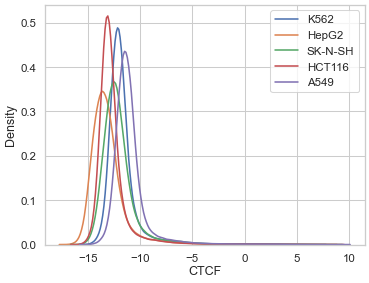

In [18]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}']
        sns.kdeplot(x, label=cell_type)
    # plt.xlim(-0.5, 5)
    plt.xlabel(f'{assay}')
    plt.legend()
    plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_distribution.png', dpi=400)
    plt.show()

In [19]:
# normalize between different cell types and assays



for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        x = MPRA_df[f'{cell_type}_{assay}']
        condition = data_split_dict['train']
        x_train = x[condition]

        x_mean = np.mean(x_train)
        x_std = np.std(x_train)
        x = (x - x_mean) / x_std

        ######
        x[x<0] = 0
        ######

        MPRA_df[f'{cell_type}_{assay}'] = x

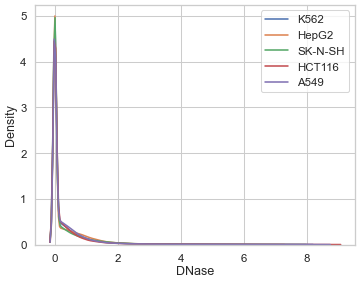

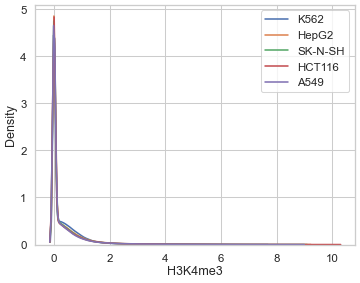

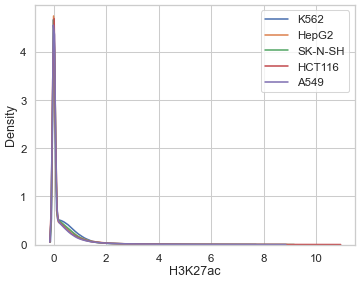

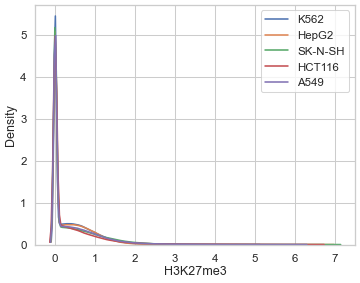

/tmp/ipykernel_1505737/2717548532.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


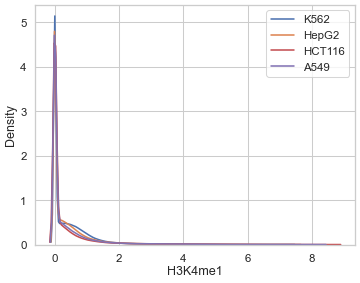

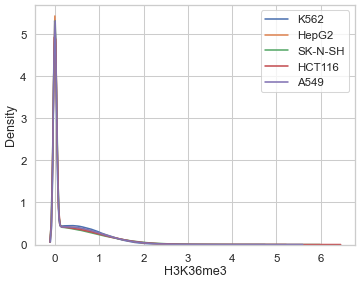

/tmp/ipykernel_1505737/2717548532.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


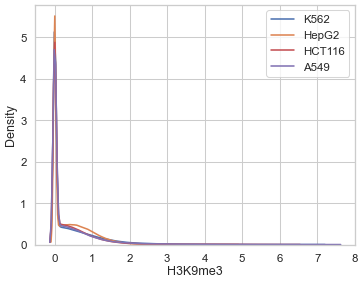

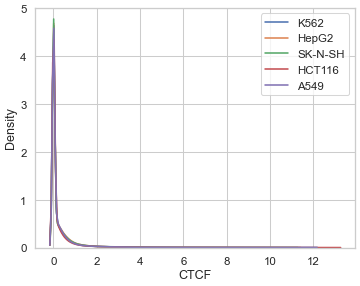

In [20]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}']
        sns.kdeplot(x, label=cell_type)
    # plt.xlim(-0.5, 5)
    plt.xlabel(f'{assay}')
    plt.legend()
    plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_distribution_norm.png', dpi=400)
    plt.show()

In [ ]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
    for cell_type in cell_types:
        for cell_type_assay in cell_types_assay:
            df = MPRA_df
            x, y = df[f'{cell_type}'], df[f'{cell_type_assay}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_assay] = r
    print(assay)
    print(corr_matrix)

In [21]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_0504_norm.csv', index=False)

In [7]:
MPRA_df = pd.read_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_feature.csv')
MPRA_df = pd.read_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_200bp_feature.csv')

MPRA_df

,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF
0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,0.633,0.080,-0.387,-4.444,-6.956,-6.873,-6.703,-5.783,-8.488,-3.961,-7.578,-5.384,-6.032,-7.611,-5.241,-6.876,-7.475,-3.527,-7.169
1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.157,-1.147,-1.507,-6.559,-9.369,-8.973,-7.284,-7.640,-9.576,-6.863,-8.628,-6.942,-8.764,-9.765,-6.074,-7.646,-8.504,-3.595,-8.063
2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,-0.066,0.186,0.655,-0.281,-8.047,-8.072,-7.983,-6.820,-8.144,-5.530,2.010,-1.340,-6.611,-8.082,-8.171,-7.341,-8.235,-4.951,3.661
3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,0.846,1.212,-0.637,-3.138,-7.407,-6.573,-7.250,-4.898,-9.185,-5.781,-7.330,-3.550,-6.643,-6.968,-6.857,-5.818,-8.678,-4.142,-6.741
4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.784,-0.630,-0.612,-4.987,-10.163,-9.557,-8.559,-8.848,-10.329,-5.503,-2.601,-7.345,-10.480,-11.171,-9.664,-9.551,-9.780,-4.879,-1.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.192,-1.080,-1.680,-7.174,-9.133,-8.446,-7.139,-8.038,-10.023,-6.401,-9.345,-7.882,-8.601,-9.362,-6.077,-8.241,-8.798,-3.721,-9.168
56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.582,-1.094,-1.637,-4.793,-7.757,-7.374,-7.370,-6.025,-9.247,-6.645,-8.898,-5.362,-7.094,-8.223,-7.246,-5.905,-9.302,-3.738,-8.447
56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.855,-0.554,-1.083,-4.787,-8.101,-7.477,-7.790,-6.158,-8.822,-6.833,-8.016,1.005,-5.632,-5.986,-8.061,-3.851,-9.757,-5.930,-5.080
56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.231,-0.927,-1.606,-7.371,-10.015,-8.915,-7.489,-8.426,-10.159,-7.142,-9.840,-7.301,-8.921,-9.352,-7.069,-7.389,-9.289,-3.766,-9.312


In [8]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

In [9]:
cell_types = ['K562', 'HepG2']

# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

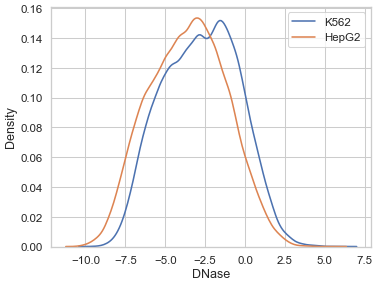

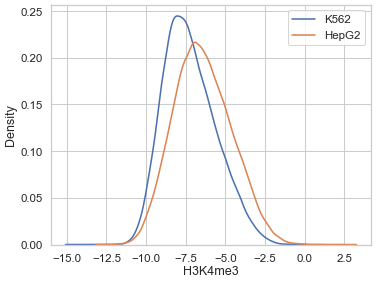

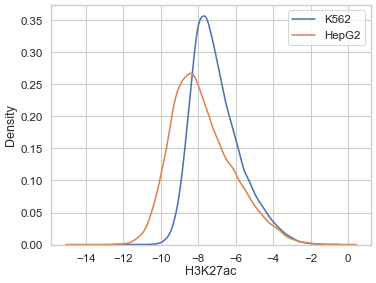

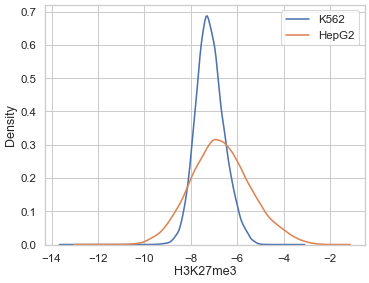

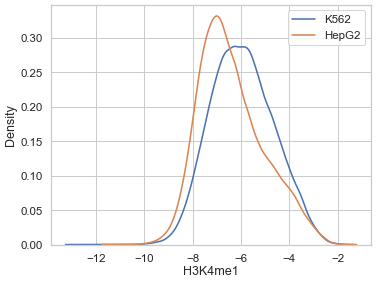

KeyboardInterrupt: 

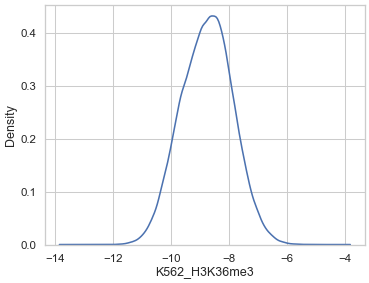

In [10]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}']
        sns.kdeplot(x, label=cell_type)
    # plt.xlim(-0.5, 5)
    plt.xlabel(f'{assay}')
    plt.legend()
    plt.savefig(f'figures/Agarwal_MPRA_Sei_{assay}_distribution.png', dpi=400)
    plt.show()

In [ ]:
MPRA_df['HepG2_CTCF'].replace([np.inf, -np.inf], np.nan, inplace=True)
MPRA_df['HepG2_CTCF'].fillna(MPRA_df['HepG2_CTCF'].mean(), inplace=True)
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

NameError: name 'MPRA_df' is not defined

In [ ]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for assay in assays:
    for cell_type in cell_types:
        df = MPRA_df
        x, y = df[f'{cell_type}'], df[f'{cell_type}_{assay}']
        r, p = pearson(x, y)
        pearson_df.loc[cell_type, assay] = r

print(pearson_df)

NameError: name 'pd' is not defined

In [ ]:
# normalize between different cell types and assays


for i, cell_type in enumerate(cell_types):

    x = MPRA_df[f'{cell_type}']
    condition = data_split_dict['train']
    x_train = x[condition]

    x_mean = np.mean(x_train)
    x_std = np.std(x_train)
    x = (x - x_mean) / x_std

    MPRA_df[f'{cell_type}'] = x



    for j, assay in enumerate(assays):
        x = MPRA_df[f'{cell_type}_{assay}']
        condition = data_split_dict['train']
        x_train = x[condition]

        x_mean = np.mean(x_train)
        x_std = np.std(x_train)
        x = (x - x_mean) / x_std

        ######
        # x[x<0] = 0
        ######

        MPRA_df[f'{cell_type}_{assay}'] = x

In [ ]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for assay in assays:
    for cell_type in cell_types:
        df = MPRA_df
        x, y = df[f'{cell_type}'], df[f'{cell_type}_{assay}']
        r, p = pearson(x, y)
        pearson_df.loc[cell_type, assay] = r

print(pearson_df)

       DNase  H3K4me3  H3K27ac  H3K27me3  H3K4me1  H3K36me3  H3K9me3   CTCF
K562   0.367    0.440    0.410     0.091    0.325     0.269    0.238  0.003
HepG2  0.244    0.306    0.363    -0.008    0.328     0.199   -0.003 -0.105


In [ ]:
MPRA_df.to_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_feature_norm.csv')